# [Introduction to Data Science](http://datascience-intro.github.io/1MS041-2023/)    
## 1MS041, 2023 
&copy;2023 Raazesh Sainudiin, Benny Avelin. [Attribution 4.0 International     (CC BY 4.0)](https://creativecommons.org/licenses/by/4.0/)

# Common discrete random variables

## Bernoulli random variable

Single trial with success probability $p$.

In [1]:
from Utils import plotEMF

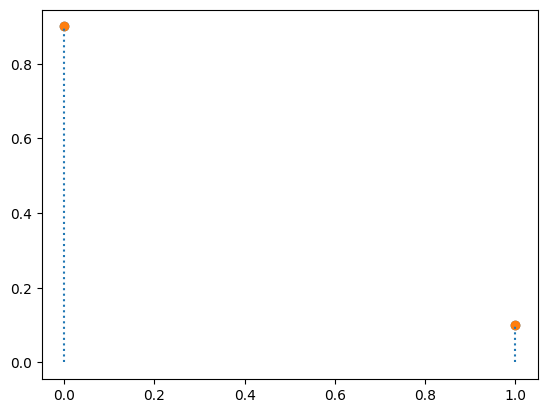

In [2]:
p = 0.1
plotEMF([(0,1-p),(1,p)])

In [4]:
import numpy as np

In [5]:
np.random.randint(0,2,size=10)

array([1, 1, 0, 0, 0, 0, 1, 0, 0, 0])

In [6]:
from Utils import plotEDF,emfToEdf

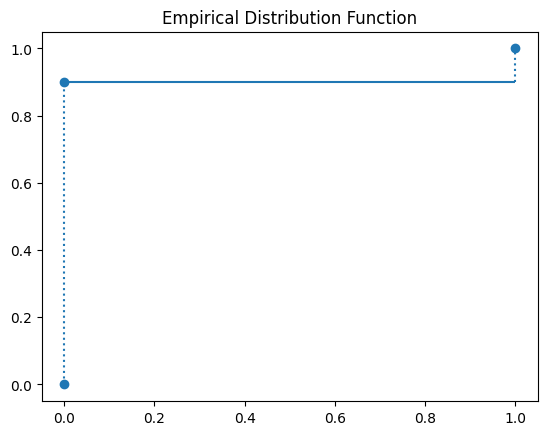

In [7]:
plotEDF(emfToEdf([(0,0),(0,1-p),(1,p)]))

## Binomial random variable

If we do $n$ trials with success probability $p$, then the binomial random variable is the number of successes. The PMF is
$$
    f(x) = {n \choose x} p^x (1-p)^{n-x}
$$
Can only produce numbers $0,1,\ldots,n$.

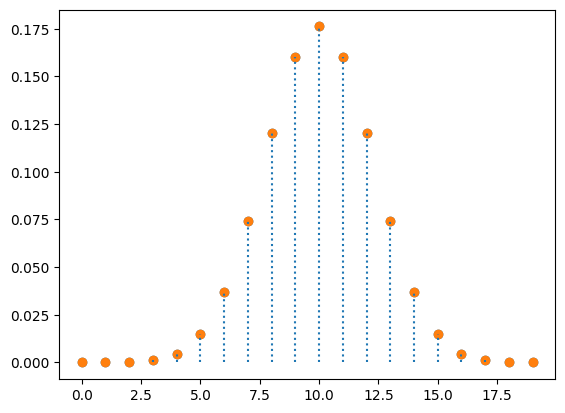

In [8]:
from scipy.special import binom as binomial
n = 20
p = 0.5
plotEMF([(i,binomial(n,i)*(p**i)*((1-p)**(n-i))) for i in range(n)])

In [ ]:
np.random.binomial(20,0.5,size=10)

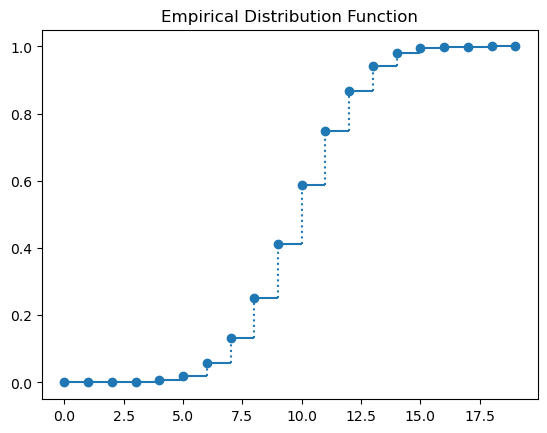

In [10]:
plotEDF(emfToEdf([(i,binomial(n,i)*(p**i)*((1-p)**(n-i))) for i in range(n)]))

## Poisson random variable
Pois($\lambda$) where $\lambda \in (0,\infty)$ is called the rate
$$
    f(x) = \frac{\lambda^x e^{-\lambda}}{x!}
$$

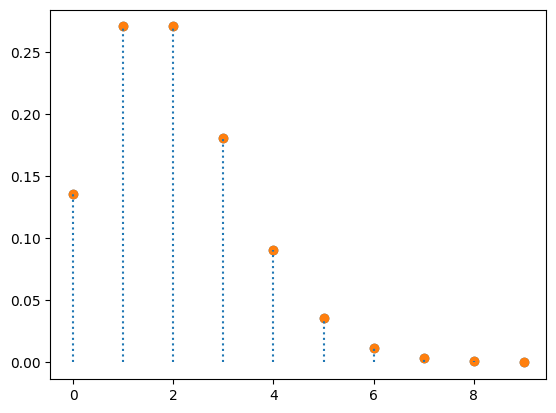

In [9]:
from scipy.special import factorial
from math import exp
l = 2
plotEMF([(i,l**i*exp(-l)/factorial(i)) for i in range(10)])

In [10]:
np.random.poisson(2,size=10)

array([1, 0, 5, 0, 0, 5, 2, 2, 1, 3])

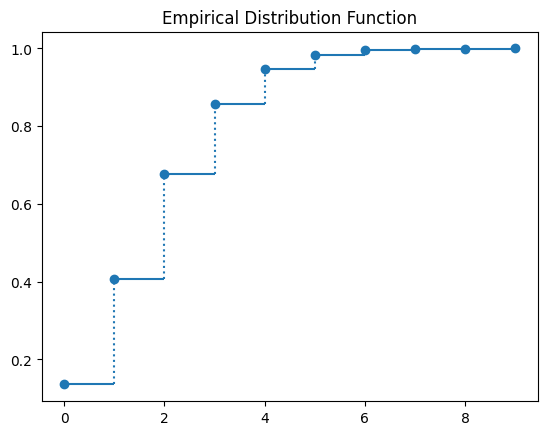

In [11]:
plotEDF(emfToEdf([(i,l**i*exp(-l)/factorial(i)) for i in range(10)]))

## Empirical means

In [12]:
from random import randint

def X():
    """Produces a single random number from DeMoivre(1/3,1/3,1/3)"""
    return randint(0,2)

def empirical_mean(n=1):
    """Produces the empirical mean of n experiments of the X above"""
    Z = [X() for i in range(n)]
    return sum(Z)/n

In [13]:
# Run this to get an observation of X and rerun for another
X

<function __main__.X()>

In [28]:
# Run this to get an observation of the empirical mean of X
# when doing 10 experiments
empirical_mean(10)

1.5

# Common continuous random variables

## The uniform [0,1] random variable
In this case we have

$$
    f(x) = 
    \begin{cases}
    1 & \text{if } 0 \leq x \leq 1 \\
    0 & \text{otherwise}
    \end{cases}
$$

Also, for $x \in [0,1]$ we have

$$
    F(x) = \int_{-\infty}^x f(v) dv = \int_0^x dv = x
$$

<table style="width:95%">
  <tr>
    <th><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/9/96/Uniform_Distribution_PDF_SVG.svg/500px-Uniform_Distribution_PDF_SVG.svg.png" alt="500px-Uniform_Distribution_PDF_SVG.svg.png" width=250></th>
    <th><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/6/63/Uniform_cdf.svg/500px-Uniform_cdf.svg.png" alt="wikipedia image 500px-Uniform_cdf.svg.png" width=250></th> 
  </tr>
</table>

In [29]:
import numpy as np

In [30]:
np.array([1,2,3])

array([1, 2, 3])

In [31]:
import matplotlib.pyplot as plt

In [32]:
x = np.random.uniform(0,1,size=100)

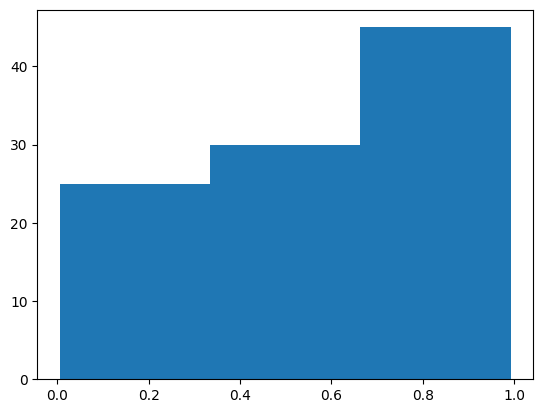

In [33]:
_=plt.hist(x,density=False,bins=3)

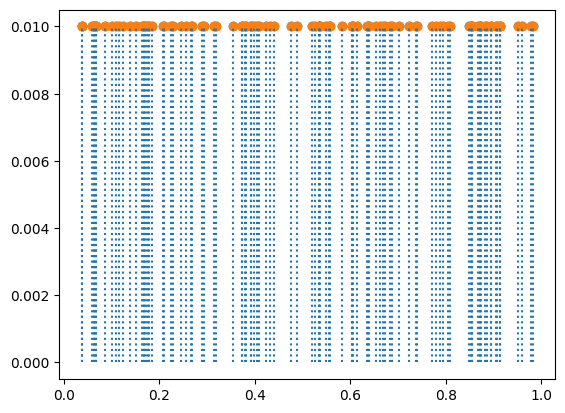

In [34]:
from Utils import makeEDF,makeEMF
plotEMF(makeEMF(np.random.uniform(size=100)))

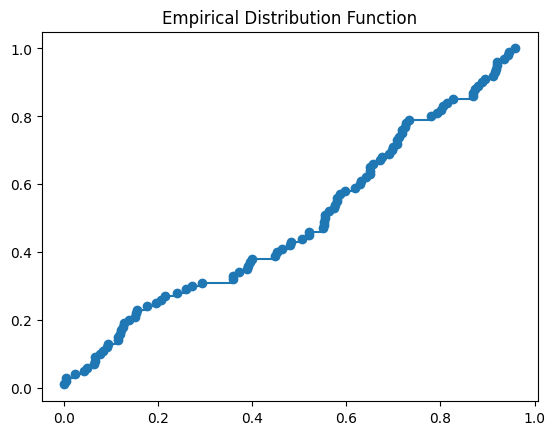

In [35]:
import numpy as np
from Utils import makeEDF,makeEMF,plotEDF
plotEDF(makeEDF(np.random.uniform(size=100)))

## The Gaussian random variable (Normal)
In this case we have
$$
    f(x) = \frac{1}{\sigma \sqrt{2\pi}} e^{-\frac{1}{2} \left ( \frac{x-\mu}{\sigma}\right )}
$$
here we have two parameters, the mean $\mu$ and the standard deviation $\sigma$.

In [36]:
np.random.normal(size=10)

array([ 0.10333219, -1.37740879,  0.93066573, -0.38591665, -0.52648917,
       -0.40684381,  1.03453637,  2.16600536, -0.32913341, -0.71659318])

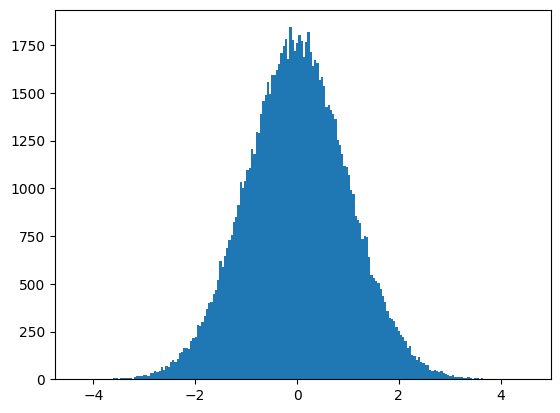

In [37]:
_=plt.hist(np.random.normal(size=100000),bins=200)